# 00 - Book Rating Radar Plots

In [129]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [130]:
ratings = pd.read_csv('ratings.csv')
ratings.columns = [x.replace('_', ' ') for x in ratings.columns]
ratings['plot_title'] = ratings.apply(lambda x: "{}\nby {}".format(x.Title, x.Author),
                                      axis=1)
ratings = ratings.set_index(['Author', 'Title'], drop=True)
ratings

,,Immersive,Plot,Originality,Prose,Characters,Enjoyment,plot_title
Author,Title,,,,,,,
Neil Gaiman,The Ocean at the End of the Lane,3,5,2,5,4,2,The Ocean at the End of the Lane\nby Neil Gaiman
Tom Sweterlitsch,The Gone World,4,5,6,4,2,5,The Gone World\nby Tom Sweterlitsch
Michelle McNamara,I'll Be Gone in the Dark,4,5,4,3,2,5,I'll Be Gone in the Dark\nby Michelle McNamara
Ted Chiang,Exhalation: Stories,5,6,6,3,2,6,Exhalation: Stories\nby Ted Chiang
Neal Stephenson,"Fall, or Dodge in Hell",4,2,5,3,1,2,"Fall, or Dodge in Hell\nby Neal Stephenson"
Blake Crouch,Recursion,4,5,5,4,4,5,Recursion\nby Blake Crouch


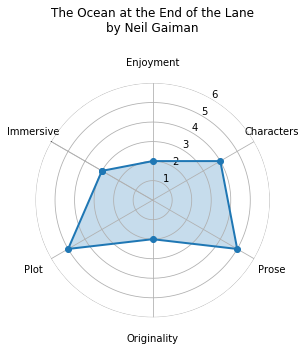

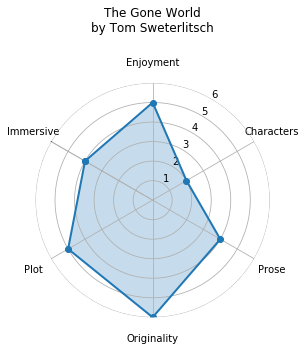

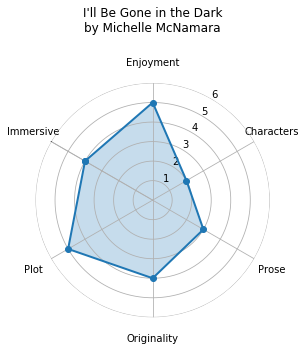

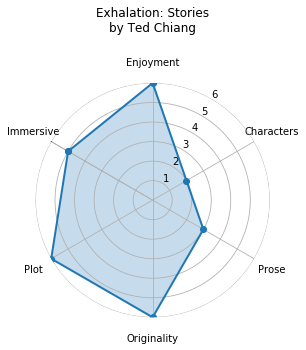

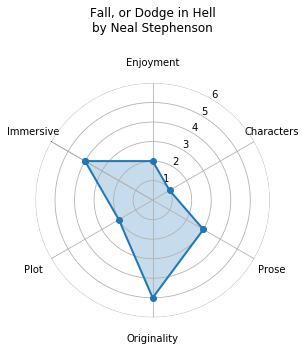

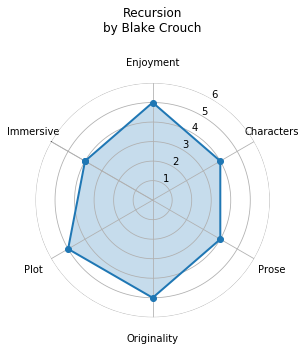

In [131]:
labels = [x.replace(' ', '\n') for x in ratings.columns[:-1]]
for i in range(len(ratings)):
    stats = ratings.iloc[i, :-1].values
    angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)

    stats = np.concatenate((stats,[stats[0]]))
    angles = np.concatenate((angles,[angles[0]]))

    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(111, polar=True)
    ax.plot(angles, stats, 'o-', linewidth=2)
    ax.fill(angles, stats, alpha=0.25)
    ax.set_thetagrids(angles * 180/np.pi, labels)
    ax.set_rlabel_position(-90)
    ax.set_theta_zero_location(loc="NW", offset=15)
    ax.set_rmax(6)
    ax.tick_params(pad=10)
    ax.set_title(ratings.iloc[i].plot_title, pad=40)
    ax.grid(True)
    plt.tight_layout()
    plt.savefig('{}.png'.format(ratings.iloc[i].plot_title))
    plt.show()